# Подготовительные работы

In [1]:
import numpy as np

In [2]:
log_space=np.logspace(-6,6,3,endpoint=True)

In [3]:
from gzip import open # NB: overrides standard open()
import pickle as pkl
import tensorly as tl
from tensorly.base import tensor_to_vec,  partial_tensor_to_vec
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl
from glob import glob
import os
import math
import functools

In [4]:
warnings.simplefilter('ignore') # отключим предупреждения Anaconda

# Применяем алгоритм построения модели

In [70]:
Xdata_numpy = pkl.load(open('C:/Users/admin/Desktop/88/X.pkl.gz', 'rb'))
Ydata = pkl.load(open('C:/Users/admin/Desktop/88/y.pkl.gz', 'rb'))
print(Xdata_numpy['emission'].shape)

(206,)


In [71]:
#разворачиваем тензор
Xdata_numpy['X'].shape = (Xdata_numpy['X'].shape[0], Xdata_numpy['X'].shape[1] * Xdata_numpy['X'].shape[2])
Xdata_numpy['X'][:,np.isnan(Xdata_numpy['X']).any(axis = 0)] = 0 # zero out any columns containing NaN

In [73]:
#делим набор на обучающий и тестовый
X_train, X_test, y_train, y_test = train_test_split(
     Xdata_numpy['X'], Ydata.iloc[:,2], test_size=0.2857
)
print(X_train.shape)
print(y_train.shape)

(25, 11330)
(25,)


In [74]:
#начинаем применять
pls1 = PLSRegression()
parametrsNames={
    'copy': [True], 
    'max_iter': [10000], 
    'n_components': [3], 
    'scale': [False], 
    'tol': [1e-06]
}

In [75]:
gridCought=GridSearchCV(pls1, parametrsNames, cv=5,return_train_score=True)
gridCought.fit(X_train,y_train)
predictors=gridCought.predict(X_test)

print(gridCought.best_params_)
print("Правильность на тестовом наборе: {:.2f}".format(gridCought.score(X_test, y_test)))

{'copy': True, 'max_iter': 10000, 'n_components': 3, 'scale': False, 'tol': 1e-06}
Правильность на тестовом наборе: 0.92


# Обработаем результаты

### Получим атрибуты плс которых нет у решётчатого поиска

In [8]:
pls3 = PLSRegression(n_components=2,scale=False,max_iter=10000,tol=1e-06)

In [9]:
 pls3.fit(Xdata_numpy['X'],np.array(Ydata.iloc[:,0]))

PLSRegression(copy=True, max_iter=10000, n_components=2, scale=False, tol=1e-06)

In [10]:
loadings=pls3.x_rotations_

In [11]:
 loadings.shape = (206, 55, loadings.shape[1])

In [12]:
loadings.shape

(206, 55, 2)

IndexError: index 2 is out of bounds for axis 2 with size 2

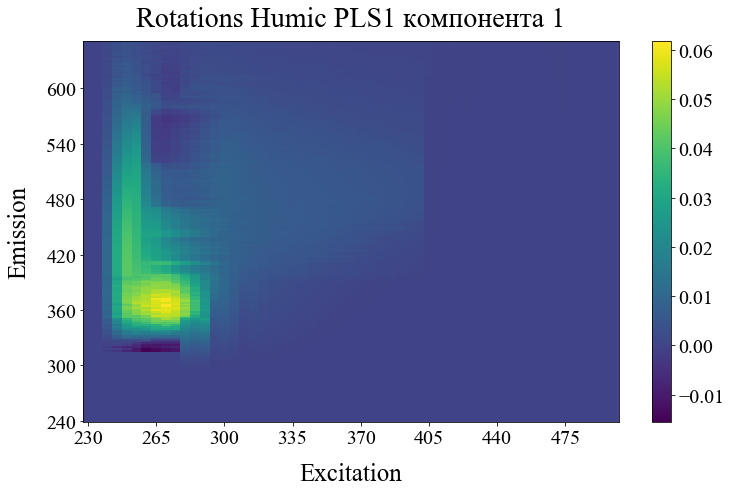

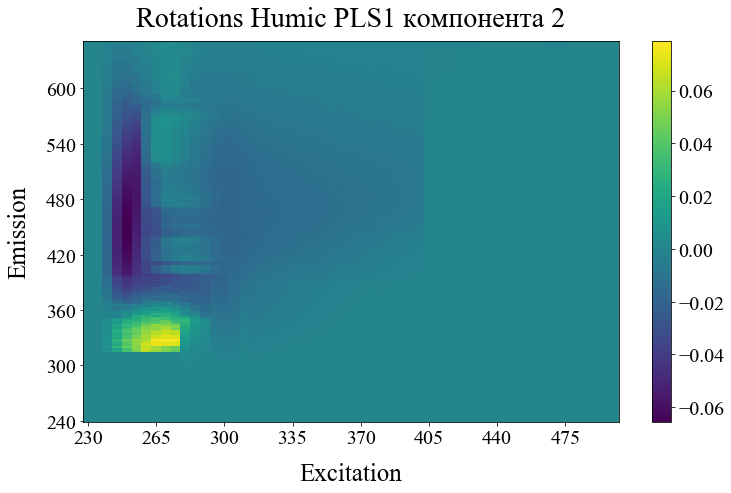

<Figure size 864x504 with 0 Axes>

In [19]:
for i in range(0,3):
    mpl.rc('font',family='Times New Roman')
    plt.figure(figsize=(12,7))
    plt.imshow(loadings[:,:,i],aspect="auto", origin='lower')

    plt.title("Rotations Humic PLS1 компонента "+str(i+1),  {'fontname':'Times New Roman'}, fontsize=28,loc="center" ,pad=15)
    plt.ylabel("Emission" , fontsize=25,labelpad=15)
    plt.xlabel("Excitation",  fontsize=25,labelpad=15)
    plt.yticks(idi,Xdata_numpy['emission'][idi],fontsize=20)
    plt.xticks(ind,Xdata_numpy['excitation'][ind], fontsize=20)
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=20)

    plt.savefig('Rotations PLS1 для Humic'+str(i)+'.png', format='png', dpi=1024)
plt.show();

In [ ]:
plt.ylabel("Образец" , fontsize=25,labelpad=15)
plt.xlabel("Компонента",  fontsize=25,labelpad=15)

In [14]:
indexi=np.arange(1,11331,2266)

In [15]:
idi=np.arange(0,206,30)

In [16]:
indexx=np.arange(1,4,1)

In [17]:
ind=np.arange(0,55,7)

In [18]:
Xdata_numpy['emission'].shape

(206,)

In [443]:
Xdata_numpy['excitation']

array(['230', '235', '240', '245', '250', '255', '260', '265', '270',
       '275', '280', '285', '290', '295', '300', '305', '310', '315',
       '320', '325', '330', '335', '340', '345', '350', '355', '360',
       '365', '370', '375', '380', '385', '390', '395', '400', '405',
       '410', '415', '420', '425', '430', '435', '440', '445', '450',
       '455', '460', '465', '470', '475', '480', '485', '490', '495',
       '500'], dtype=object)

In [20]:
cvres  = gridCought.cv_results_

#### Попробуем сохранить результаты в пикль формате

In [193]:
pkl.dump(weights,open('C:/Users/admin/Desktop/88/PLS1_Trp_Weights.pkl.gz', 'wb'))

NameError: name 'weights' is not defined

In [133]:
pkl.dump(cvres,open('C:/Users/admin/Desktop/88/PLS1_gomimy.pkl.gz', 'wb'))

In [134]:
pkl.dump(gridCought.best_params_,open('C:/Users/admin/Desktop/88/PLS1_bestparams_gomimy.pkl.gz', 'wb'))

In [135]:
pkl.dump(gridCought.best_estimator_,open('C:/Users/admin/Desktop/88/PLS1_bestestimator_gomimy.pkl.gz', 'wb'))

In [136]:
pkl.dump(gridCought.score,open('C:/Users/admin/Desktop/88/PLS1_bestscore_gomimy.pkl.gz', 'wb'))

In [137]:
pkl.dump(predictors,open('C:/Users/admin/Desktop/88/PLS1_predictors_gomimy.pkl.gz', 'wb'))

In [138]:
pkl.dump(y_test,open('C:/Users/admin/Desktop/88/PLS1_true_meaning_gomimy.pkl.gz', 'wb'))

In [139]:
pkl.dump(y_train,open('C:/Users/admin/Desktop/88/PLS1_train_y_meaning_gomimy.pkl.gz', 'wb'))

### Считываем данные

In [4]:
cvr=pkl.load(open('C:/Users/admin/Desktop/88/PLS1_Tyr.pkl.gz', 'rb'))

In [21]:
bestparameters=pkl.load(open('C:/Users/admin/Desktop/88/PLS1_bestparams_Trp.pkl.gz', 'rb'))

In [22]:
best_score=pkl.load(open('C:/Users/admin/Desktop/88/PLS1_bestscore_Trp.pkl.gz', 'rb'))

In [23]:
best_estimator=pkl.load(open('C:/Users/admin/Desktop/88/PLS1_bestestimator_Trp.pkl.gz', 'rb'))

In [24]:
etest=pkl.load(open('C:/Users/admin/Desktop/88/PLS1_true_meaning_Trp.pkl.gz', 'rb'))

In [170]:
etrain=pkl.load(open('C:/Users/admin/Desktop/88/PLS1_train_y_meaning_Trp.pkl.gz', 'rb'))

In [171]:
bestparameters

{'copy': True,
 'max_iter': 10000,
 'n_components': 3,
 'scale': False,
 'tol': 1e-06}

In [48]:
best_score()

<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=PLSRegression(copy=True, max_iter=500, n_components=2,
                                     scale=True, tol=1e-06),
             iid='warn', n_jobs=None,
             param_grid={'copy': [True], 'max_iter': [10000],
                         'n_components': range(1, 85), 'scale': [True, False],
                         'tol': array([1.e-06, 1.e+00, 1.e+06])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)>

In [140]:
gridCought.best_params_

{'copy': True,
 'max_iter': 10000,
 'n_components': 6,
 'scale': True,
 'tol': 1e-06}

In [128]:
max(cvr['mean_test_score'])

0.13713433435992708

In [13]:
ylow=cvr[ "mean_test_score" ]

In [14]:
xlow2=cvr[ "params" ][45]['n_components']

In [15]:
xlow2

8

### train-score

In [16]:
ylow2=cvr[ "mean_train_score" ]

### Строим метки оси ох

In [17]:
xx=np.arange(-100,600,100)

In [18]:
xx

array([-100,    0,  100,  200,  300,  400,  500])

In [48]:
max(ylow)

0.4655068523945856

In [59]:
xlab=[]
mmm=[]
ylow=[]
ylow2=[]

In [60]:
for i in range(0,34):
    if (cvres[ "params" ][i]['scale']==False):
        mmm+=[cvres[ "params" ][i]]
        xlab+=[cvres[ "params" ][i]['n_components']]
        ylow+=[cvres[ "mean_test_score" ][i]]
        ylow2+=[cvres[ "mean_train_score" ][i]]

### Строим метки оси оу

In [8]:
yy=np.arange(-0.8,1.2,0.2)

In [9]:
yy=[ -0.80, -0.6,-0.4,  -0.20,0.0,  0.20, 0.4,  0.60,  0.8, 1.00,1.2 ]

# Графики нового образца

In [10]:
xlab3=[]
for i in np.arange(0,19,2):
    xlab3+=[i]

In [11]:
xlab

[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6]

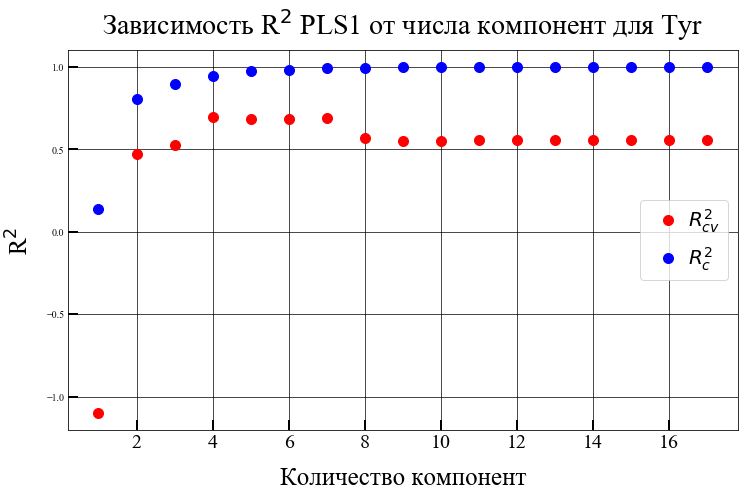

In [62]:
mpl.rc('font',family='Times New Roman')
fig, axs = plt.subplots(figsize=(12, 7))
axs.plot(xlab,ylow,".",color="red",ms=20,label='$R_{cv}^{2}$')
axs.plot(xlab,ylow2,".",color="blue",ms=20,label='$R_c^{2}$')
axs.set_ylabel('R$^{2}$',  fontsize=25,labelpad=12)
axs.grid(color="black",linewidth=0.7)
axs.set_xlabel("Количество компонент",  fontsize=25,labelpad=15)
axs.set_title("Зависимость R$^{2}$ PLS1 от числа компонент для Tyr", fontsize=28,loc="center" ,pad=15)
axs.tick_params(which='major', length=10, width=2)
axs.set_xticklabels(xlab3, fontsize=20)
axs.set_yticklabels(yy, fontsize=20)
axs.get_xaxis().set_tick_params(direction='in')
axs.get_yaxis().set_tick_params(direction='in')
axs.legend(loc=7,fontsize=20, markerscale=1,handletextpad=0)

plt.savefig('Зависимость score от параметров для PLS1_Tyr.png', format='png', dpi=102)
plt.show();

In [62]:
axs.set_xticklabels(xlab, fontsize=20)
axs.set_yticklabels(yy, fontsize=20)

Object `fig.get_xaxis().set_tick_params` not found.


In [21]:
yy=np.arange(-1,1.25,0.25)

In [22]:
yy=[-1.0 , -0.75, -0.5 , -0.25,  0.0 ,  0.25,  0.5 ,  0.75,  1.0,1.25  ]

In [23]:
### Предикт референс график нового образца

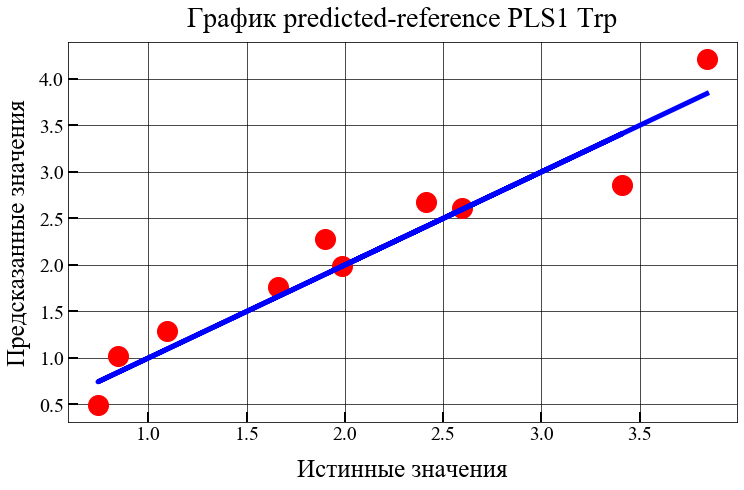

In [80]:
mpl.rc('font',family='Times New Roman')
fig, axs = plt.subplots(figsize=(12, 7))
axs.plot(y_test,predictors,".",color="red",ms=40)
axs.plot(y_test,y_test,color="blue",lw=5)
axs.set_ylabel("Предсказанные значения" , fontsize=25,labelpad=8)
axs.grid(color="black",linewidth=0.7)
axs.set_xlabel("Истинные значения",  fontsize=25,labelpad=15)
axs.set_title("График predicted-reference PLS1 Trp", fontsize=28,loc="center" ,pad=15)
axs.tick_params(which='major', length=10, width=2)
axs.set_xticklabels(xlab6, fontsize=20)
axs.set_yticklabels(yy, fontsize=20)
axs.get_xaxis().set_tick_params(direction='in')
axs.get_yaxis().set_tick_params(direction='in')
plt.savefig('График predicted-reference PLS11 Trp.png', format='png', dpi=1024)
plt.show();

In [77]:
yy=np.arange(0.0,5.5,0.5)

In [78]:
xlab6=np.arange(0.5,5.5,0.5)

In [81]:
s=0
n=0
for i in y_test:
    s+=i
    n+=1
sr=s/n
n

10

In [82]:
type(y_test)

pandas.core.series.Series

In [83]:
s1=0
s2=0
for i in range(0,len(y_test)):
    s1+=(y_test.iloc[i]-predictors[i])**2
    s2+=(y_test.iloc[i]-sr)**2
print(1-(s1/s2))

[0.9183153]


In [68]:
0.7693

0.7693

# Предыдущий механизм построения графика

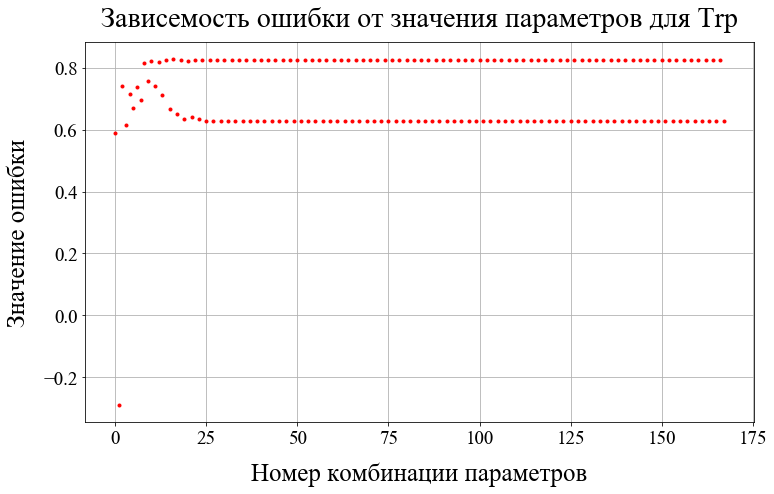

In [33]:
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')
plt.figure(figsize=(12,7))
plt.plot(ylow,".",color="red")
plt.ylabel("Значение ошибки" , fontsize=25,labelpad=12)
plt.grid()
plt.xlabel("Номер комбинации параметров",  fontsize=25,labelpad=15)
plt.title("Зависимость ошибки от значения параметров для Trp", fontsize=28,loc="center" ,pad=15)


plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
plt.savefig('Зависимость ошибки от параметров для PLS1_Trp2.jpeg', format='png', dpi=100)
plt.show();

In [142]:
pls1.get_params()

{'copy': True, 'max_iter': 500, 'n_components': 2, 'scale': True, 'tol': 1e-06}

# Оценим правильность на тестовом наборе

In [115]:
print("Правильность на тестовом наборе: {:.2f}".format(gridCought.score(X_test, y_test)))

Правильность на тестовом наборе: nan


In [116]:
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(gridCought.best_score_))

Наилучшее значение кросс-валидац. правильности: 0.32


In [117]:
from  sklearn.metrics import  mean_squared_error
final_mse = mean_squared_error (y_test,  predictors) 
final_rmse  =  np.sqrt(final_mse)  
print(final_rmse)

3.0825621365425135


In [118]:
from  sklearn.metrics import accuracy_score
print(gridCought.accuracy_score(y_test,  predictors))

AttributeError: 'GridSearchCV' object has no attribute 'accuracy_score'

In [119]:
print(predictors)
print(y_test)

[[42.98438284]]
31    39.901821
Name: Gominy, dtype: float64


# Построим график для визуализации результатов

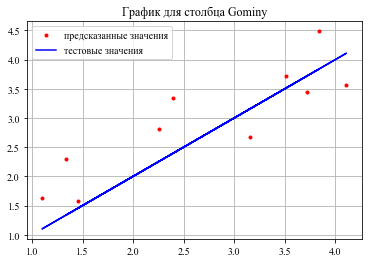

In [81]:
b=[]
for  i in range(0,5):
    b+=[i]
plt.plot(y_test,predictors, ".",color="red",label="предсказанные значения")
plt.plot(y_test,y_test,color="blue", label="тестовые значения")
plt.legend()
plt.grid(True)
plt.title("График для столбца Gominy")
plt.show();

In [153]:
area3x=np.arange(1,4.5,0.5)

In [154]:
area3y=np.arange(0,5,0.5)

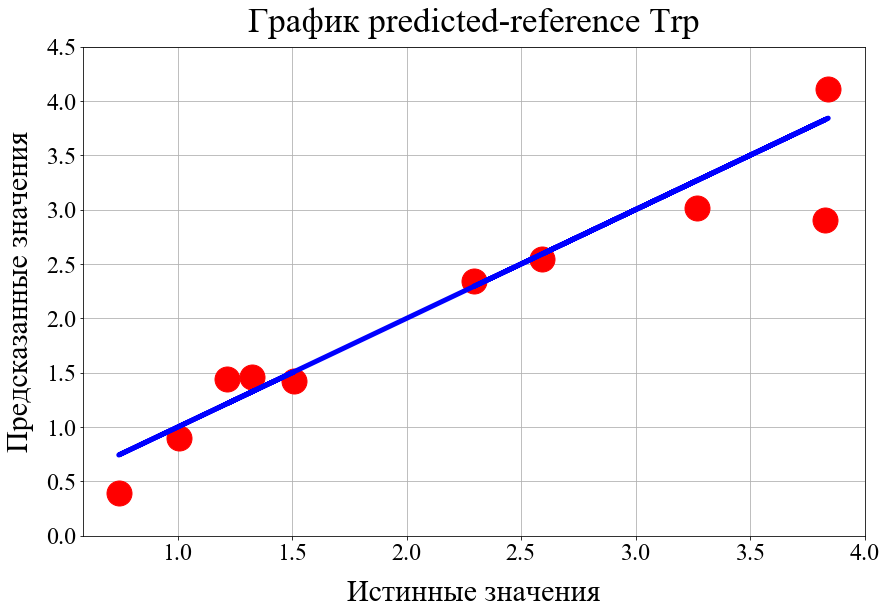

In [156]:
mpl.rc('font',family='Times New Roman')
plt.figure(figsize=(14,9))
plt.plot(y_test,predictors, ".",color="red",ms=50)
plt.plot(y_test,y_test,color="blue",lw=5)

plt.ylabel("Предсказанные значения" , fontsize=30,labelpad=12)
plt.grid()
plt.xlabel("Истинные значения",  fontsize=30,labelpad=15)
plt.title("График predicted-reference Trp", fontsize=35,loc="center" ,pad=15)


plt.yticks(area3y,fontsize=24)
plt.xticks(area3x,fontsize=24)
plt.savefig('График predicted-reference Trp.jpeg', format='png', dpi=1000)
plt.show();

In [105]:
?plt.plot

# Возьмём матрицу нагрузок

TypeError: getattr expected at least 2 arguments, got 1

In [172]:
?gridCought

In [171]:
gridCought.coef_

AttributeError: 'GridSearchCV' object has no attribute 'coef_'